## Train a simple convnet on the Fashion MNIST dataset
In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
% matplotlib inline
import vis
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


### Find no.of samples are there in training and test datasets

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

##Find dimensions of an image in the dataset

In [5]:
x_train.shape

(60000, 28, 28)

### Convert train and test labels to one hot vectors

**check `keras.utils.to_categorical()`**

In [0]:
x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [0]:
y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

##Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255
x_test_conv = x_test_conv.astype("float32") / 255

##Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras


In [0]:
x_train_conv = x_train.reshape(x_train_conv.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test_conv.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

##Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

##Build a model 

**with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`**

In [13]:
model_simple_conv = Sequential()
model_simple_conv.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_simple_conv.add(Conv2D(32, (3, 3), activation ="relu"))
model_simple_conv.add(Flatten())
model_simple_conv.add(Dense(128, activation='relu'))
model_simple_conv.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_simple_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [16]:
%%time 
from keras.callbacks import EarlyStopping
early_stopping = [EarlyStopping(patience=5)]
output_pooling_conv = model_simple_conv.fit(x_train_conv, y_train_class, batch_size=512, epochs=10, verbose=2, callbacks=early_stopping,
                    validation_data=(x_test_conv, y_test_class))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 130s - loss: 12.9261 - acc: 0.1970 - val_loss: 12.9138 - val_acc: 0.1988
Epoch 2/10
 - 128s - loss: 12.9578 - acc: 0.1960 - val_loss: 12.9025 - val_acc: 0.1995
Epoch 3/10
 - 126s - loss: 12.9009 - acc: 0.1996 - val_loss: 12.9025 - val_acc: 0.1995
Epoch 4/10
 - 125s - loss: 12.9009 - acc: 0.1996 - val_loss: 12.9025 - val_acc: 0.1995
Epoch 5/10
 - 125s - loss: 12.9009 - acc: 0.1996 - val_loss: 12.9025 - val_acc: 0.1995
Epoch 6/10
 - 125s - loss: 12.9009 - acc: 0.1996 - val_loss: 12.9025 - val_acc: 0.1995
Epoch 7/10
 - 125s - loss: 12.9009 - acc: 0.1996 - val_loss: 12.9025 - val_acc: 0.1995
CPU times: user 28min 35s, sys: 25.1 s, total: 29min
Wall time: 14min 44s


##Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [17]:
model_pooling_conv = Sequential()
model_pooling_conv.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Dropout(0.25))
model_pooling_conv.add(Conv2D(32, (3, 3), activation ="relu"))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Dropout(0.25))
model_pooling_conv.add(Flatten())
model_pooling_conv.add(Dense(128, activation='relu'))
model_pooling_conv.add(Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model_pooling_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
__________

In [0]:
model_pooling_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [20]:
%%time 
from keras.callbacks import EarlyStopping
output_pooling_conv = model_pooling_conv.fit(x_train_conv, y_train_class, batch_size=512, epochs=10, verbose=2, callbacks=early_stopping,
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 54s - loss: 3.8951 - acc: 0.5793 - val_loss: 0.6963 - val_acc: 0.7563
Epoch 2/10
 - 53s - loss: 0.6310 - acc: 0.7711 - val_loss: 0.5048 - val_acc: 0.8204
Epoch 3/10
 - 53s - loss: 0.5132 - acc: 0.8119 - val_loss: 0.4452 - val_acc: 0.8398
Epoch 4/10
 - 53s - loss: 0.4575 - acc: 0.8325 - val_loss: 0.4038 - val_acc: 0.8541
Epoch 5/10
 - 53s - loss: 0.4172 - acc: 0.8456 - val_loss: 0.3848 - val_acc: 0.8592
Epoch 6/10
 - 53s - loss: 0.3930 - acc: 0.8540 - val_loss: 0.3793 - val_acc: 0.8564
Epoch 7/10
 - 53s - loss: 0.3732 - acc: 0.8615 - val_loss: 0.3448 - val_acc: 0.8712
Epoch 8/10
 - 53s - loss: 0.3540 - acc: 0.8685 - val_loss: 0.3269 - val_acc: 0.8817
Epoch 9/10
 - 52s - loss: 0.3388 - acc: 0.8741 - val_loss: 0.3222 - val_acc: 0.8824
Epoch 10/10
 - 52s - loss: 0.3297 - acc: 0.8763 - val_loss: 0.3186 - val_acc: 0.8832
CPU times: user 16min 45s, sys: 19.6 s, total: 17min 5s
Wall time: 8min 49s


##Now, to the above model, lets add Data Augmentation
### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [0]:
datagen.fit(x_train_conv)

##Showing 5 versions of the first image in training dataset using image datagenerator.flow()

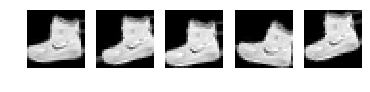

In [25]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_conv[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

##Run the above model using fit_generator()

In [26]:
x_train_conv[:1].shape

(1, 28, 28, 1)

In [0]:
datagen.fit(x_train_conv[:1])

In [0]:
samples = datagen.flow(x_train_conv[:1])

In [0]:
image = []
for i in range(3):
    img = samples.next()
    img = img.squeeze()
    image.append(img)

In [32]:
image[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.39442003e-01, 8.04654479e-01, 2.01838002e-01, 7.89697945e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.50176227e-01, 1.41780972e+00,
        4.67759788e-01, 0.00000000e+00, 2.27447778e-01, 1.19306183e+00,
        9.59933162e-01, 2.21987173e-01, 1.97581983e+00, 2.29022

##Report the final train and validation accuracy

In [33]:
model_pooling_conv.evaluate(x_test_conv,y_test_class)

10000/10000 [==============================] - 3s 337us/step


[0.31857962555885316, 0.8832]